Task 3

In [8]:
!ls

data.processed_data.pkl		   model_list.json
en_stem_pos_LDAvis_prepared6	   README.md
en_stem_pos_LDAvis_prepared6.html  stem_pos_ldavis_prepared_6
ldavis_prepared_6		   train_tweets.csv
ldavis_prepared_6.html		   train_tweets.ods
LICENSE				   twitter_sentiment_analysis-Chatbot.ipynb
mb.csv				   twitter_sentiment_analysis-Copy3.ipynb
model_list-Copy1.json		   ulmfit.ipynb


In [11]:
import pickle
processed_data=None
with open("data.processed_data.pkl","rb") as f:
    processed_data = pickle.load(f)

In [9]:
train_orig = pd.read_csv("train_tweets.csv")

In [12]:
processed_data["user_type"]=train_orig["user_type"]

In [15]:
processed_data["user_type"]=processed_data["user_type"].fillna(0)

In [16]:
processed_data["user_type"] = processed_data["user_type"].astype(int)


In [17]:
# Check that the latest 1.0.0 build of PyTorch has been installed 
# alongside fastai
import torch
print("Cuda available" if torch.cuda.is_available() is True else "CPU")
print("PyTorch version: ", torch.__version__)

CPU
PyTorch version:  1.2.0


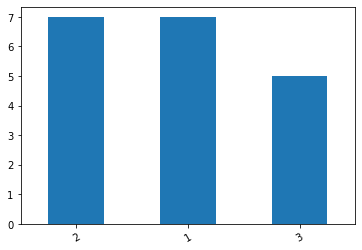

In [19]:
# Plot value counts for rach stance in the dataset
processed_data[processed_data["user_type"]!=0]["user_type"].value_counts().plot.bar(rot=30);

In [25]:
processed_data[processed_data["user_type"]!=0].columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'location',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'profile_image_url', 'lang', 'SentimentText', 'tokenized_text',
       'stem_tokenized_text', 'neg', 'neu', 'pos', 'compound', 'user_type'],
      dtype='object')

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(processed_data[processed_data["user_type"]!=0].tweet)
X_train_counts.shape
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(19, 347)

In [27]:
y=processed_data[processed_data["user_type"]!=0].user_type
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y)

In [31]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(processed_data[processed_data["user_type"]!=0].tweet, y)


# Performance of NB Classifier
import numpy as np
predicted = text_clf.predict(processed_data[processed_data["user_type"]!=0].tweet)
np.mean(predicted == y)

1.0

In [32]:

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(processed_data[processed_data["user_type"]!=0].tweet, y)
predicted_svm = text_clf_svm.predict(processed_data[processed_data["user_type"]==0].tweet)

/home/zhanwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
